# Genetic Algorithm Demonstration

## Continuous Problem

In [1]:
import numpy as np

import pyga

from design import Design

In [2]:
def double_banana(x, peaks=(1.0, 1.5), offsets=(0.0, 6.0), scales=(0.1, 0.2), curvatures=(-1, 1)):
    x1, x2 = x
    bananas = [
        peak * np.exp(-scale * ((x2 - curvature * (x1 - offset)**2) ** 2 + (x1 - offset - 2) ** 2))
        for peak, offset, scale, curvature in zip(peaks, offsets, scales, curvatures)
    ]
    return sum(bananas)

In [3]:
class Posterior:

    def __init__(self, distribution):
        self.distribution = distribution

    def evaluate(self, x):
        """
        Evaluate the posterior distribution for given model parameters and observed data.

        Parameters
        ----------
        x : float or array-like
            The value(s) of the model parameters.

        Returns
        -------
        float or array-like
            The posterior probability distribution for the given model parameters.
        """
        return self.distribution(x)

    def plot(self, ax=None, x1_range=np.linspace(-10, 10, 1000), x2_range=np.linspace(-10, 10, 1000)):
        """
        Plot the full posterior distribution
        """
        X1, X2 = np.meshgrid(x1_range, x2_range)
        Z = np.array([[self.evaluate((x1, x2)) for x1 in x1_range] for x2 in x2_range])
        Z = np.where(Z > 0.01, Z, np.nan)  # Mask values below a threshold

        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)

        ax.contour(X1, X2, Z, levels=40, cmap='viridis')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        plt.gca().set_frame_on(False)
        plt.xticks([])
        plt.yticks([])
        return ax

In [4]:
posterior = Posterior(distribution=double_banana)
Design.set_posterior(posterior)

Evolution: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 528.65it/s]


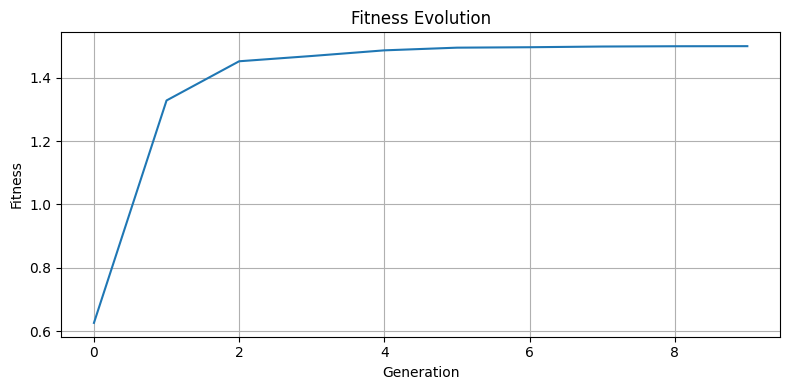

In [11]:
population_size = 100
individuals = [Design(genes=[np.random.uniform(-5, 15), np.random.uniform(-80, 30)]) for _ in range(population_size)]
population = pyga.Population(individuals)

ga = pyga.GeneticAlgorithm(population, 
                           num_generations=10, 
                           num_parents=8,
                           mutation_probability=0.05,
                           animate=False)
ga.evolve()
ga.plot_fitness()

In [12]:
for individual in population.individuals:
    print(individual.genes)

[7.95724675 3.82090316]
[7.97040779 3.85663037]
[7.96272302 3.86177378]
[7.96719018 3.8353155 ]
[7.97694305 3.88660971]
[7.87260424 3.84565073]
[7.97411662 3.90241028]
[7.97277351 3.85658342]
[7.9609559  3.86126142]
[7.97290599 3.90823028]
[8.07576457 3.85660875]
[7.95644029 3.82950022]
[7.9818869  3.82310112]
[7.97009868 3.85673805]
[7.97707266 3.84569925]
[7.95991955 3.84461649]
[7.96376797 3.84586231]
[7.97014767 3.85795005]
[7.89674151 3.83126079]
[7.9550115  3.82774739]
[7.96031404 3.82188347]
[7.96954822 3.82456112]
[7.96719778 3.8550918 ]
[7.96336712 3.8581782 ]
[7.95227356 3.8645697 ]
[7.97313691 3.9009551 ]
[7.95785342 3.85465615]
[7.97136613 3.85749295]
[7.95870613 3.83316548]
[7.96806576 3.85607322]
[7.95071467 3.85988381]
[7.95835486 3.85008141]
[7.95385327 3.82978578]
[7.9775994  3.90679201]
[7.9618342  3.89048174]
[7.98877088 3.84074603]
[7.97186758 3.85695509]
[7.9590794  3.86685027]
[7.9654678  3.86935634]
[7.97107546 3.85965933]
[7.97094161 3.86230253]
[7.9625158  3.82